<a href="https://colab.research.google.com/github/Thanh-a9/TH1/blob/main/TH1_Kalman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
file_path = "/content/train.csv"
df = pd.read_csv(file_path)

df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [ ]:
df_tuesday = df[df['Publication_Day'] == 'Tuesday'].reset_index(drop=True)

In [ ]:
file = "/content/only.csv"
df_tuesday.to_csv(file, index=False)

In [ ]:
df = pd.read_csv(file)
df.head(20)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
1,23,Digital Digest,Episode 17,97.25,Technology,36.10,Tuesday,Afternoon,80.43,0.0,Neutral,89.71709
2,28,Melody Mix,Episode 88,55.66,Music,98.62,Tuesday,Night,56.84,0.0,Neutral,25.47053
3,30,Comedy Corner,Episode 26,105.46,Comedy,34.65,Tuesday,Night,62.55,2.0,Neutral,76.78874
4,54,Innovators,Episode 21,NaN,Technology,75.00,Tuesday,Afternoon,45.58,0.0,Neutral,71.17189
5,60,Money Matters,Episode 53,96.97,Business,22.65,Tuesday,Evening,86.70,0.0,Positive,94.61787
6,71,Learning Lab,Episode 73,46.39,Education,23.12,Tuesday,Afternoon,3.86,3.0,Negative,37.53785
7,75,Business Briefs,Episode 20,67.87,Business,72.70,Tuesday,Night,74.19,1.0,Neutral,52.06062
8,81,Money Matters,Episode 94,51.70,Business,25.40,Tuesday,Evening,72.70,0.0,Negative,29.65280
9,85,Music Matters,Episode 23,9.73,Music,31.68,Tuesday,Morning,52.06,1.0,Neutral,6.01368


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98103 entries, 0 to 98102
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           98103 non-null  int64  
 1   Podcast_Name                 98103 non-null  object 
 2   Episode_Title                98103 non-null  object 
 3   Episode_Length_minutes       86247 non-null  float64
 4   Genre                        98103 non-null  object 
 5   Host_Popularity_percentage   98103 non-null  float64
 6   Publication_Day              98103 non-null  object 
 7   Publication_Time             98103 non-null  object 
 8   Guest_Popularity_percentage  78765 non-null  float64
 9   Number_of_Ads                98103 non-null  float64
 10  Episode_Sentiment            98103 non-null  object 
 11  Listening_Time_minutes       98103 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 9.0+ MB


In [ ]:
df.isnull().sum()

,0
id,0
Podcast_Name,0
Episode_Title,0
Episode_Length_minutes,11856
Genre,0
Host_Popularity_percentage,0
Publication_Day,0
Publication_Time,0
Guest_Popularity_percentage,19338
Number_of_Ads,0


In [ ]:
df['Episode_Length_minutes'] = df.groupby('Genre')['Episode_Length_minutes'].transform(lambda x: x.fillna(x.mean()))

df['Guest_Popularity_percentage'] = df['Guest_Popularity_percentage'].fillna(df['Guest_Popularity_percentage'].mean())

time_mapping = {'Morning': 0, 'Afternoon': 1, 'Evening': 2, 'Night': 3}
df['Publication_Time_Num'] = df['Publication_Time'].map(time_mapping)

sentiment_mapping = {'Negative': -1, 'Neutral': 0, 'Positive': 1}
df['Sentiment_Num'] = df['Episode_Sentiment'].map(sentiment_mapping)

In [22]:
df.to_csv('cleaneddata.csv', index=False)

In [ ]:
df.isnull().sum()

,0
id,0
Podcast_Name,0
Episode_Title,0
Episode_Length_minutes,0
Genre,0
Host_Popularity_percentage,0
Publication_Day,0
Publication_Time,0
Guest_Popularity_percentage,0
Number_of_Ads,0


In [23]:
df.columns = [
    "ID", "Program", "Episode", "Views", "Genre", "Rating", "Day", "Time",
    "Revenue", "Episodes_Aired", "Sentiment", "Engagement_Index", "Week", "Trend"
]

In [24]:
# Lấy chuỗi thời gian: trung bình lượt xem theo Tuần
ts_views = df.groupby("Week")["Views"].mean().sort_index().values

In [25]:
from pykalman import KalmanFilter

# Áp dụng Kalman Filter
kf = KalmanFilter(n_dim_obs=1)
filtered_state_means, _ = kf.filter(ts_views)

print("Kalman Filter - Lượt xem đã lọc:\n", filtered_state_means.flatten())

Kalman Filter - Lượt xem đã lọc:
 [32.52187964 52.43045113 60.46502247 64.36689367]


In [26]:
from sklearn.preprocessing import MinMaxScaler

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
ts_views_scaled = scaler.fit_transform(ts_views.reshape(-1, 1))

# Áp dụng Kalman Filter
kf = KalmanFilter(n_dim_obs=1)
filtered_state_means_scaled, _ = kf.filter(ts_views_scaled)

# Chuyển về thang đo gốc
filtered_views = scaler.inverse_transform(filtered_state_means_scaled)

print("Normalizing Kalman - Lượt xem đã lọc:\n", filtered_views.flatten())

Normalizing Kalman - Lượt xem đã lọc:
 [65.04375929 65.43920298 65.46838857 66.27994542]


In [27]:
import torch
import torch.nn as nn
import torch.optim as optim

# Chuẩn hóa dữ liệu đầu vào
def normalize(data):
    return (data - data.mean()) / (data.std() + 1e-8)

# Chuẩn bị dữ liệu dạng tensor
X = torch.tensor(normalize(ts_views), dtype=torch.float32).unsqueeze(1)

# Mạng nơ-ron đơn giản để học trạng thái ẩn
class SimpleDKF(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Linear(1, 8)
        self.lstm = nn.LSTM(8, 8, batch_first=True)
        self.decoder = nn.Linear(8, 1)

    def forward(self, x):
        x = torch.relu(self.encoder(x))
        x, _ = self.lstm(x.unsqueeze(1))
        return self.decoder(x).squeeze(1)

model = SimpleDKF()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Huấn luyện
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output, X)
    loss.backward()
    optimizer.step()

# Dự đoán
model.eval()
with torch.no_grad():
    predicted = model(X).numpy()

print("Deep Kalman Filter - Dự đoán lượt xem:\n", predicted.flatten())

Deep Kalman Filter - Dự đoán lượt xem:
 [-1.1036687  -0.04504528 -0.44984806  1.6110444 ]


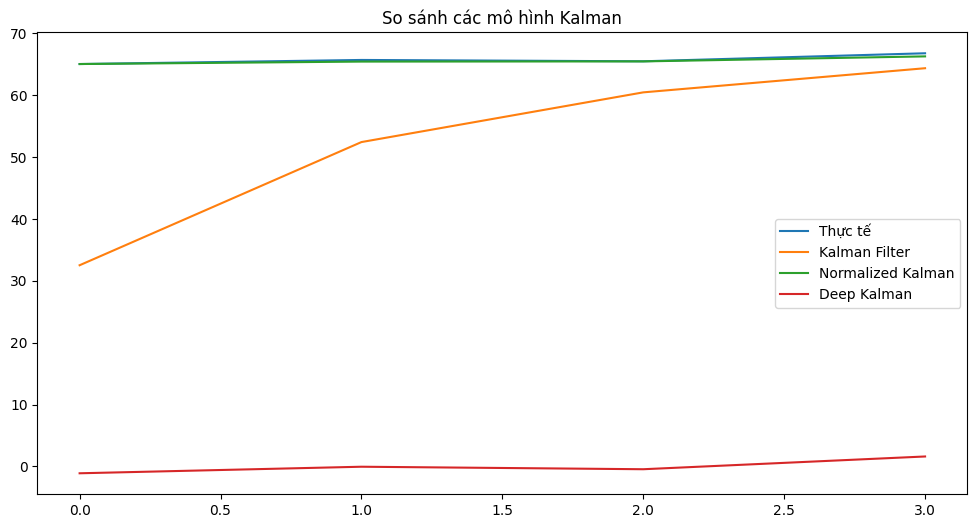

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(ts_views, label="Thực tế")
plt.plot(filtered_state_means, label="Kalman Filter")
plt.plot(filtered_views, label="Normalized Kalman")
plt.plot(predicted, label="Deep Kalman")
plt.legend()
plt.title("So sánh các mô hình Kalman")
plt.show()